# _STAT 201 Group Project: Analysis of the Effect of Tree Location on Tree Diameter_

##### _Group 31: Alexandr Kim, Yingshan Wu, Yang Lei, Harbor Zhang_

## Introduction

In our statistical investigation, we will be looking at street trees dataset provided by the City of Vancouver (See __Appendix A__). The street tree dataset lists out the information about the trees that are located within city of Vancouver with diverse classifications such as species name of the tree, common name, number of trees on street side name, and number of trees on different neighbourhood. We are going to select the `CURB` (which classifies the data into 2 category of whether or not the tree is located at the curb) and evaluating it with the `DIAMETER` (in inches). Using this data set, we are going to mainely use `infer`, `tidyverse`, and `ggplot2` packages in order to compute hypothesis testing utilising difference in means of two type of trees that we selected under the significance level of 95% ($\alpha$ = 0.05) to answer an inferential question: "Are the diametres of trees at the curb different from those which are not located at the curb?". And later on, we are also going to contruct a 95% confidence interval to predict the true population difference in means of tree diameters on and not on the curb.

## Methods and Results

1. We first need to decide our null hypothesis and alternative hypothesis alongside with the significance level beforehand of computing analysis: 
    The null hypothesis is that the mean diametre of the trees that are located at the curb is the same as the mean diametre of the trees which are not at the curb. 
    The alternative hypothesis is that the mean diameter of the trees that are located at the curb is different from the mean diameter of the trees which are not at the curb. 
2. Next, we use the `infer` package to calculate the observed test statistic (observed difference in means). 
3. After that, we generate 1000 samples from the null distribution and calculate the difference in means for each sample. 
4. Then, we visualise the null distribution and the observed test statistic in one plot, and we shade the two-sided p-value. 
5. Followingly, we compare the p-value with the 5% significance level and make our conclusion whether to reject the null hypothesis. 
6. The next step is that we are going to find a 95% confidence interval for the difference in mean. We will generate 1000 bootstrapping samples and calculate the difference in means for each sample. 
7. We will be looking at t-distribution.
8. Last, we get our confidence interval and visualise it with the bootstrap distribution.

We assume that the mean diameter of the trees planted on the curb would be different from the mean diameter of the trees planted not on the curb. In reality, city planning might have different needs and standards on trees’ thickness on and not on the curb. This finding could provide evidence on whether existing trees on and not on the curb have differences in thickness, and it could present as data assisting future analysis. For future tree planting in Vancouver, we can use the results we find from this analysis to do effective city planning as the City of Vancouver can better arrange trees with different diameters to look more standardised and visually appealing.

First we load the necessary libraries for this data analysis.

In [1]:
library(tidyverse)
library(cowplot)
library(gridExtra)
library(infer)
library(repr)
library(ggplot2)
library(data.table)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




Then we load the data set. We will use `glimpse()` function in `dplyr` package to show the glimpse of our data set.

In [2]:
street_trees_data <- fread("https://opendata.vancouver.ca/explore/dataset/street-trees/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B")

glimpse(street_trees_data)

Rows: 151,101
Columns: 19
$ TREE_ID            <int> 64083, 64091, 64092, 64093, 64101, 64104, 64105, 64…
$ CIVIC_NUMBER       <int> 4711, 3820, 3820, 6068, 1825, 3985, 3985, 3985, 398…
$ STD_STREET         <chr> "CAMBIE ST", "CAMBIE ST", "CAMBIE ST", "CAMBIE ST",…
$ GENUS_NAME         <chr> "PICEA", "QUERCUS", "QUERCUS", "PICEA", "PRUNUS", "…
$ SPECIES_NAME       <chr> "OMORIKA", "ROBUR", "ROBUR", "OMORIKA", "SERRULATA"…
$ CULTIVAR_NAME      <chr> "", "", "", "", "KWANZAN", "DAWYCKII GOLD", "", "",…
$ COMMON_NAME        <chr> "SERBIAN SPRUCE", "ENGLISH OAK", "ENGLISH OAK", "SE…
$ ASSIGNED           <chr> "N", "N", "N", "N", "Y", "N", "N", "N", "N", "Y", "…
$ ROOT_BARRIER       <chr> "N", "N", "N", "N", "N", "N", "N", "N", "N", "N", "…
$ PLANT_AREA         <chr> "25", "5", "5", "25", "B", "4", "B", "B", "B", "5",…
$ ON_STREET_BLOCK    <int> 4700, 400, 400, 3000, 1800, 3900, 500, 500, 500, 50…
$ ON_STREET          <chr> "CAMBIE ST", "W 22ND AV", "W 22ND AV", "CAMBIE ST",…
$ NEIGHBOURHOO

Table.1: Preview of the street tree data set.

_Table.1 is a preview of our data set._

Through `glimpse()` function, we can now that we have 151101 rows in our data set. This means that we have our random sample that has the sample size of $n$ = 151101. <br>
One this to note here is that we should not be confused as $n$ = 151101 as being our population size as we do not know about the population and hence we are utilising statistical inference method. 

As we can see that our original data set contains lots of irrelevant data in our statistical investigation as we only need `CURB` and `DIAMETER`. We clean and wrangle the data into a tidy format by selecting only the `CURB` and `DIAMETER` column and filtering out all `NA` values using the function `!is.na()` .

In [3]:
set.seed(1234)

tidy_street_trees <- 
    street_trees_data %>%
    filter(!is.na(DIAMETER)) %>%
    select(CURB, DIAMETER)

head(tidy_street_trees)

CURB,DIAMETER
<chr>,<dbl>
Y,3.00
Y,27.00
Y,21.00
Y,2.25
Y,4.50
Y,3.00


Table.2: Preview of the tidy tree data set.

_Table.2 is a preview of the tidy data set, which will be used for further analysis._

As our data is tidied up, we visualise our data using boxplots in order to see whether there are any outliers that may impact our investigation. We can see that it is hard for us to see the difference in diameter distribution in the left plot below. We create a new plot (the right plot below) by loging the values in diameter, which helps us compare and contrast the diameter distribution for trees near the curb and trees not near the curb.

Warning message:
“Removed 39 rows containing non-finite values (stat_boxplot).”


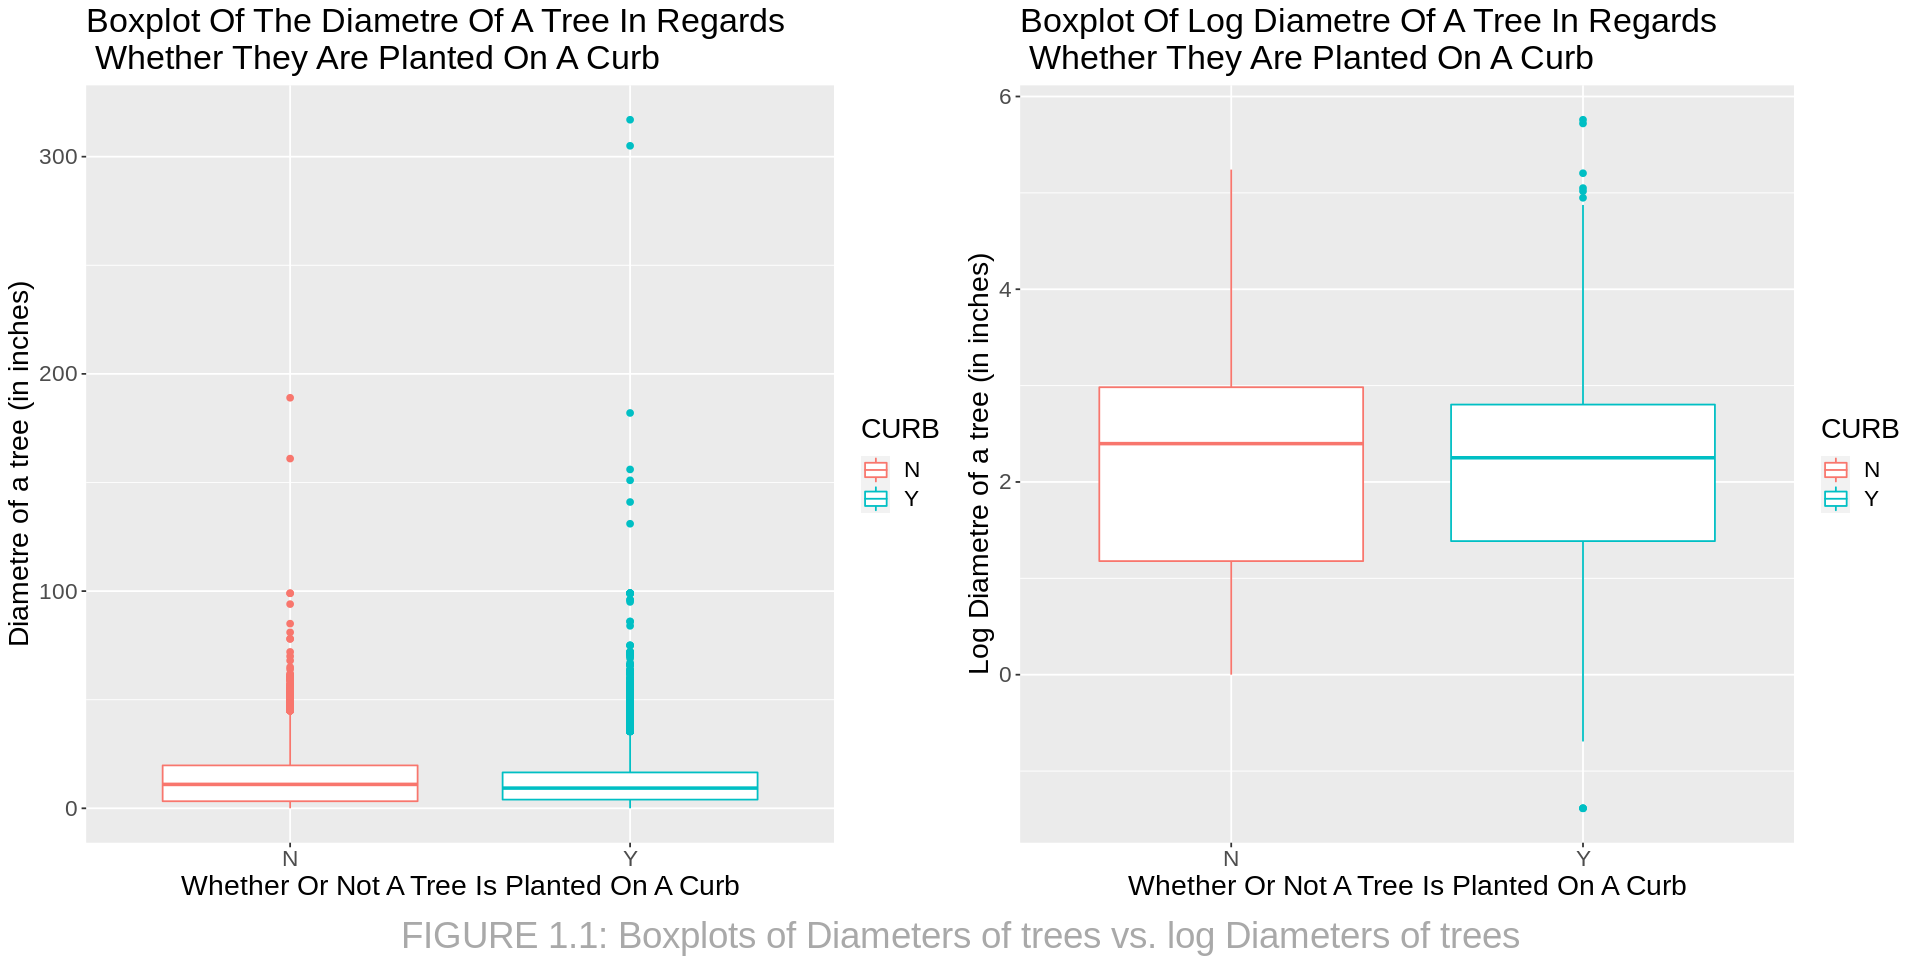

In [4]:
set.seed(1234)
options(repr.plot.width = 16, repr.plot.height = 8)

tree_curb_Y <- 
    tidy_street_trees %>%
    filter(CURB == "Y") 

tree_curb_N <- 
    tidy_street_trees %>%
    filter(CURB == "N") 

original_dist_plot <- ggplot(tidy_street_trees) +
    geom_boxplot(aes(x = CURB, y = DIAMETER, colour = CURB)) +
    ggtitle("Boxplot Of The Diametre Of A Tree In Regards \n Whether They Are Planted On A Curb") +
    xlab("Whether Or Not A Tree Is Planted On A Curb") +
    ylab("Diametre of a tree (in inches)") +
    theme(text = element_text(size = 17))

log_dist_plot <- ggplot(tidy_street_trees) +
    geom_boxplot(aes(x = CURB, y = log(DIAMETER), colour = CURB)) +
    ggtitle("Boxplot Of Log Diametre Of A Tree In Regards \n Whether They Are Planted On A Curb") +
    xlab("Whether Or Not A Tree Is Planted On A Curb") +
    ylab("Log Diametre of a tree (in inches)") +
    theme(text = element_text(size = 17)) 

boxplots <- plot_grid(original_dist_plot, log_dist_plot, ncol = 2)

ggdraw(add_sub(boxplots, "FIGURE 1.1: Boxplots of Diameters of trees vs. log Diameters of trees", 
               size = 22, color = "darkgrey"))

_The left boxplot in Figure 1.2 shows the diameter distribution of trees on curb with our original sample. The right histogram in Figure 1.1 shows the distribution with logarithmic diameter._

Through the boxplot above, we can tell there are some observations classified as outliers (Separated dots in both plots indicate the outliers). We create histograms in order to see the trend of the distribution effectively and more visually.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


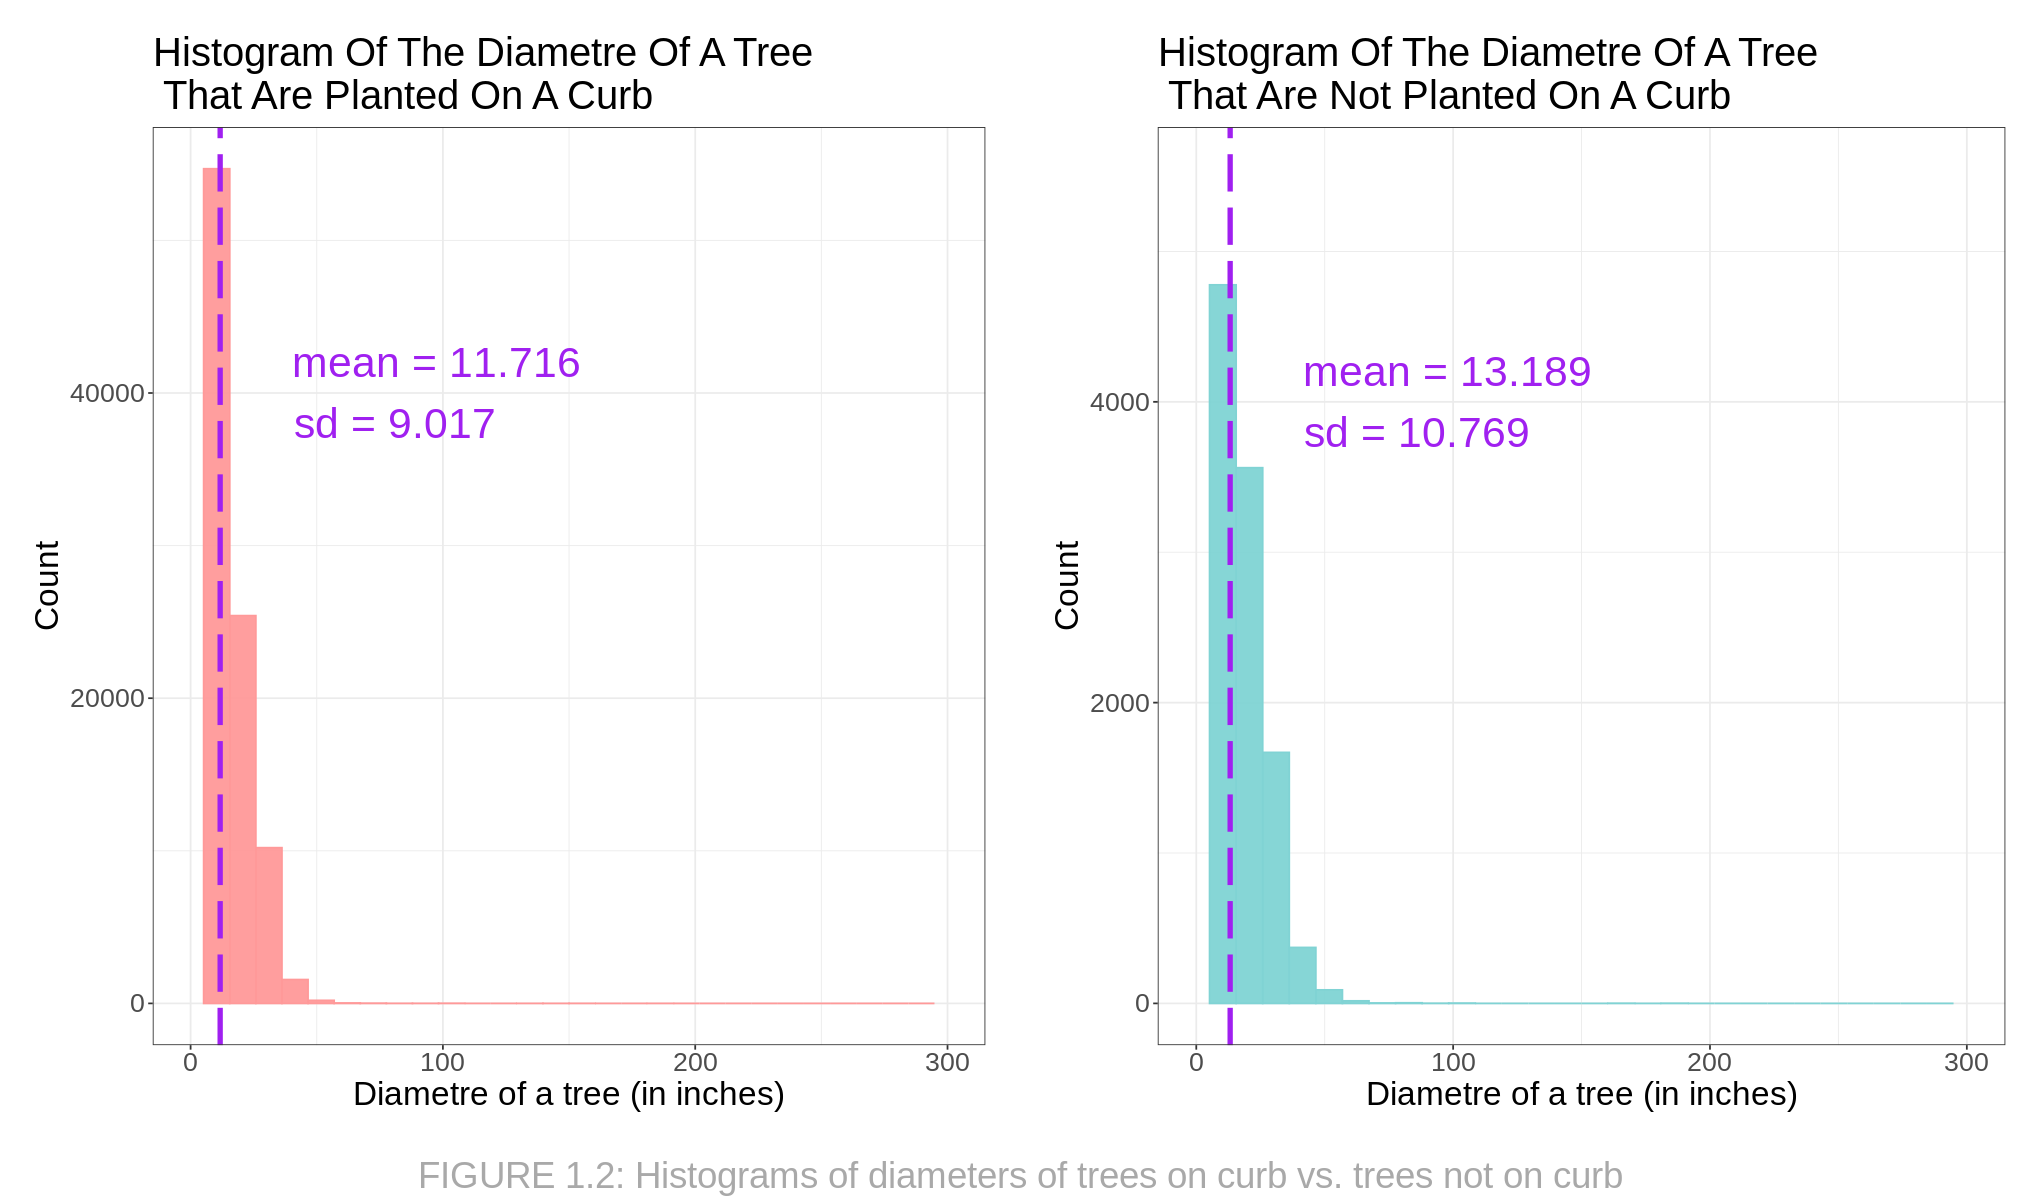

In [5]:
set.seed(1234)
options(repr.plot.width = 17, repr.plot.height = 10)

MDY <- mean(tree_curb_Y$DIAMETER)
MDN <- mean(tree_curb_N$DIAMETER)

SDDY <- sd(tree_curb_Y$DIAMETER)
SDDN <- sd(tree_curb_N$DIAMETER)

tree_curb_Y_histo <- 
    tree_curb_Y %>%
    ggplot() +
        geom_histogram(aes(DIAMETER), colour = "#FF9999", fill = "#FF9999", alpha = .95 ,bins = 30) +
        labs(x = 'Diametre of a tree (in inches)',
             y = "Count",
             title = 'Histogram Of The Diametre Of A Tree \n That Are Planted On A Curb') +
        geom_vline(xintercept = MDY, colour = "purple", size = 1.5, linetype = 5) +
        xlim(0, 300) +
        theme_bw() +
        theme(text = element_text(size = 20)) +
        annotate("text", x = 100, y = 40000, label = "mean = 11.716 \nsd = 9.017        ", size = 9, color = "purple")

tree_curb_N_histo <- 
    tree_curb_N %>%
    ggplot() +
        geom_histogram(aes(DIAMETER), colour = "#80d3d4", fill = "#80d3d4", alpha = .95 ,bins = 30) +
        labs(x = 'Diametre of a tree (in inches)',
             y = "Count",
             title = 'Histogram Of The Diametre Of A Tree \n That Are Not Planted On A Curb') +
        geom_vline(xintercept = MDN, colour = "purple", size = 1.5, linetype = 5) +
        xlim(0, 300) +
        theme_bw() +
        theme(text = element_text(size = 20)) +
        annotate("text", x = 100, y = 4000, label = "mean = 13.189 \nsd = 10.769      ", size = 9, color = "purple")


tree_curb_histo <- plot_grid(tree_curb_Y_histo, tree_curb_N_histo, scale = 0.95)

ggdraw(add_sub(tree_curb_histo, "FIGURE 1.2: Histograms of diameters of trees on curb vs. trees not on curb", 
               size = 22, color = "darkgrey"))

_The left histogram in Figure 1.2 shows the diameter distribution of trees on curb with our original sample. The right histogram in Figure 1.1 shows the diameter distribution of trees not on curb with our original sample._

After visualising the data into two histograms above, we can clearly tell that the observations are significantly right skewed. We visualize the sampling distribution of the means to get a brief idea of how the means are distributed.

We decided not to remove our outliers out from our data set as we condsidered out outliers are taking into account for natural variations in the population, meaning that outlier values presented in our sample data set is true outliers.

Setting `type = "bootstrap"` in `generate()`.

Warning message:
“Duplicated aesthetics after name standardisation: colour”
Setting `type = "bootstrap"` in `generate()`.

Warning message:
“Duplicated aesthetics after name standardisation: colour”


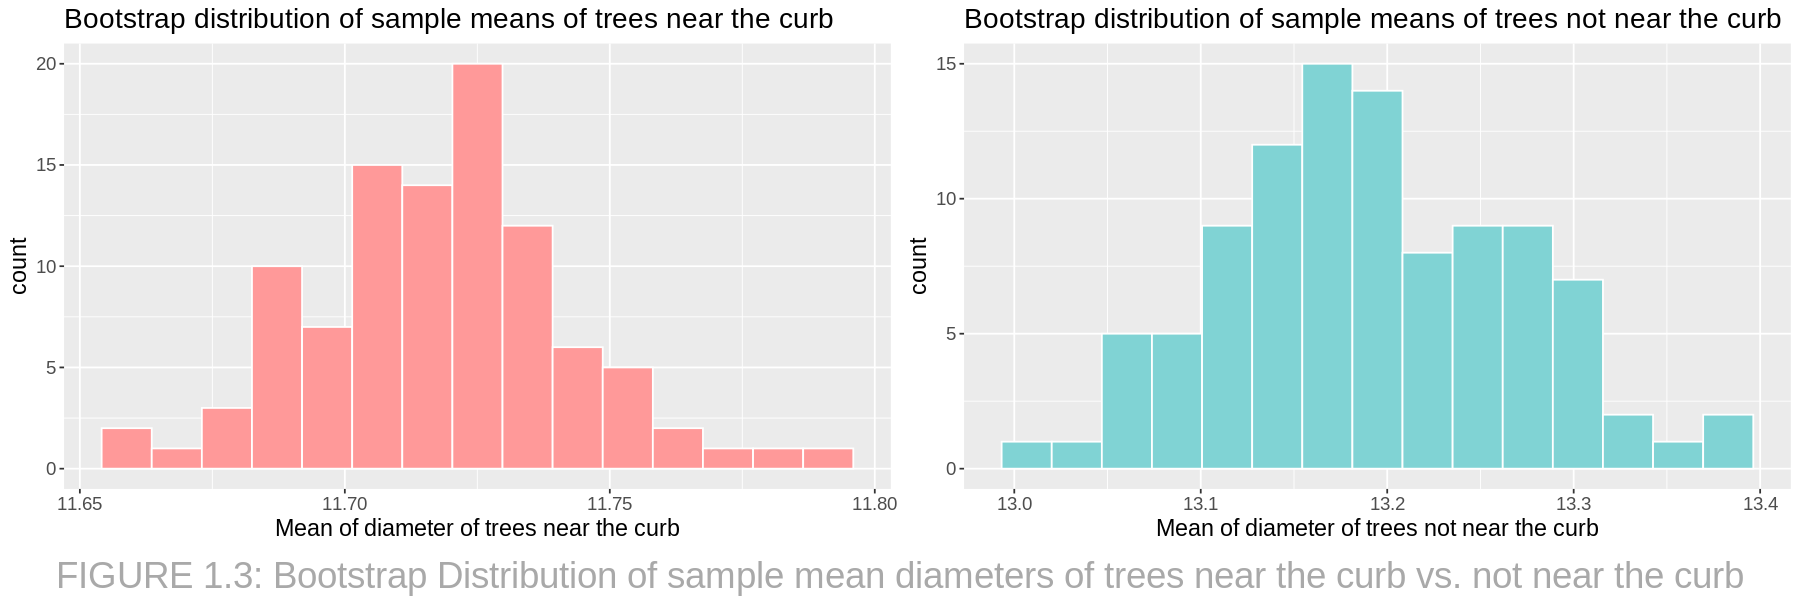

In [6]:
set.seed(1234)
options(repr.plot.width = 15, repr.plot.height = 5)

bootstrap_distribution_Y <- tree_curb_Y %>% 
    specify(response = DIAMETER) %>% 
    generate(reps = 100) %>% 
    calculate(stat = "mean") %>%
    visualise(colour = "#FF9999", fill = "#FF9999") +
    xlab("Mean of diameter of trees near the curb") +
    ggtitle("Bootstrap distribution of sample means of trees near the curb") +
    theme(text = element_text(size = 14))

bootstrap_distribution_N <- tree_curb_N %>% 
    specify(response = DIAMETER) %>% 
    generate(reps = 100) %>% 
    calculate(stat = "mean") %>%
    visualise(colour = "#80d3d4", fill = "#80d3d4") +
    xlab("Mean of diameter of trees not near the curb") +
    ggtitle("Bootstrap distribution of sample means of trees not near the curb") +
    theme(text = element_text(size = 14))

tree_curb_bootstrap_dist <- plot_grid(bootstrap_distribution_Y, bootstrap_distribution_N)

ggdraw(add_sub(tree_curb_bootstrap_dist, "FIGURE 1.3: Bootstrap Distribution of sample mean diameters of trees near the curb vs. not near the curb", 
               size = 22, color = "darkgrey"))

_The left histogram in Figure 1.3 shows the bootstrap distribution of sample mean of diameters of trees on curb with our original sample. The right histogram in Figure 1.1 shows the bootstrap distribution of sample mean of diameters of trees not on curb with the original sample._

As we can see from histograms above that we visualised a bootstrap distribution of sample means of each categories (`CURB == "Y"` and `CURB == "N"`), these graphs became more normal shape than the two sample distribution plots. The histograms above follow to some extent normal shape than the histogram from original street tree sample, it does not exactly demonstrates an ideal normal distribution graph as due to small number of repitition. This limitation occurred due to limitation of our kurnel that only allows up to approximately 100 `reps`.

## Contructing Hypothesis test

First, our population parameter of interest is the difference in population means of tree diameters $d_{y}$ - $d_{n}$, where $d_{y}$ is the mean of diameters of trees on the curb, and $d_{n}$ is of trees not on the curb. Then, we set the null hypothesis $H_{0}$ to be that there is no difference in means of diameters of trees on and not on the curb. And the alternative hypothesis $H_{1}$ to be that there is a difference. 

$H_{0} : d_{y} - d_{n} = 0 $

$H_{1} : d_{y} - d_{n} \neq 0 $

We first count the numbers of trees planted on and not on the curb respectively in `tidy_street_trees` to get a picture of our data.

In [7]:
set.seed(1234)

tree_count <-
    tidy_street_trees %>% 
    count(CURB)

tree_count

CURB,n
<chr>,<int>
N,16050
Y,135051


Table.3: Counts of each category (i.e., trees on the curb `Y` and trees not on the curb`N`)

_Table.3 shows the counts of trees on the curb (the second row) and the counts of trees not on the curb (the first row)._

Then, we calculate the observed test statistic (means of trees on the curb minus means of trees not on the curb)  using `tidy_street_trees` with the `infer` package.

In [8]:
set.seed(1234)

obs_diff_in_means <- tidy_street_trees %>%
    specify(formula = DIAMETER ~ CURB) %>%
    calculate(stat = "diff in means", order = c("Y", "N")) %>%
    pull()

obs_diff_in_means

[1] -1.472007

_This output (`obs_diff_in_means` = -1.4734292567395) is the difference between the mean of trees on the curb and the mean of trees not on the curb (mean of trees on the curb minus mean of trees not on the curb)._

We are going to use both bootstrap and t-test to generate p-values for the observed difference in means.

### 1. Bootstrap Method

First, we generate the null distribution with 100 samples and calculate mean of trees on the curb minus mean of trees not on the curb, using `tidy_street_trees` with the `infer` package.

In [9]:
set.seed(1234)

null_diff_in_means <- 
    tidy_street_trees %>%
    specify(formula = DIAMETER ~ CURB) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 100, type = "permute") %>%
    calculate(stat = "diff in means", order = c("Y", "N"))

head(null_diff_in_means)

replicate,stat
<int>,<dbl>
1,0.004602046
2,-0.009138473
3,0.068584587
4,0.045689762
5,-0.056107614
6,0.040949489


Table.4: preview of null distribution of differences between the mean of trees on the curb and the mean of trees not on the curb.

_Table.4 is a preview of null distribution of differences between the mean of trees on the curb and the mean of trees not on the curb, namely the preview of the ideal distribution of the differences when assuming the null hypothesis $H_{0}$ is true._

We visualise the result of the hypothesis test with a vertical bar for the observed test statistic, and shade the tails.

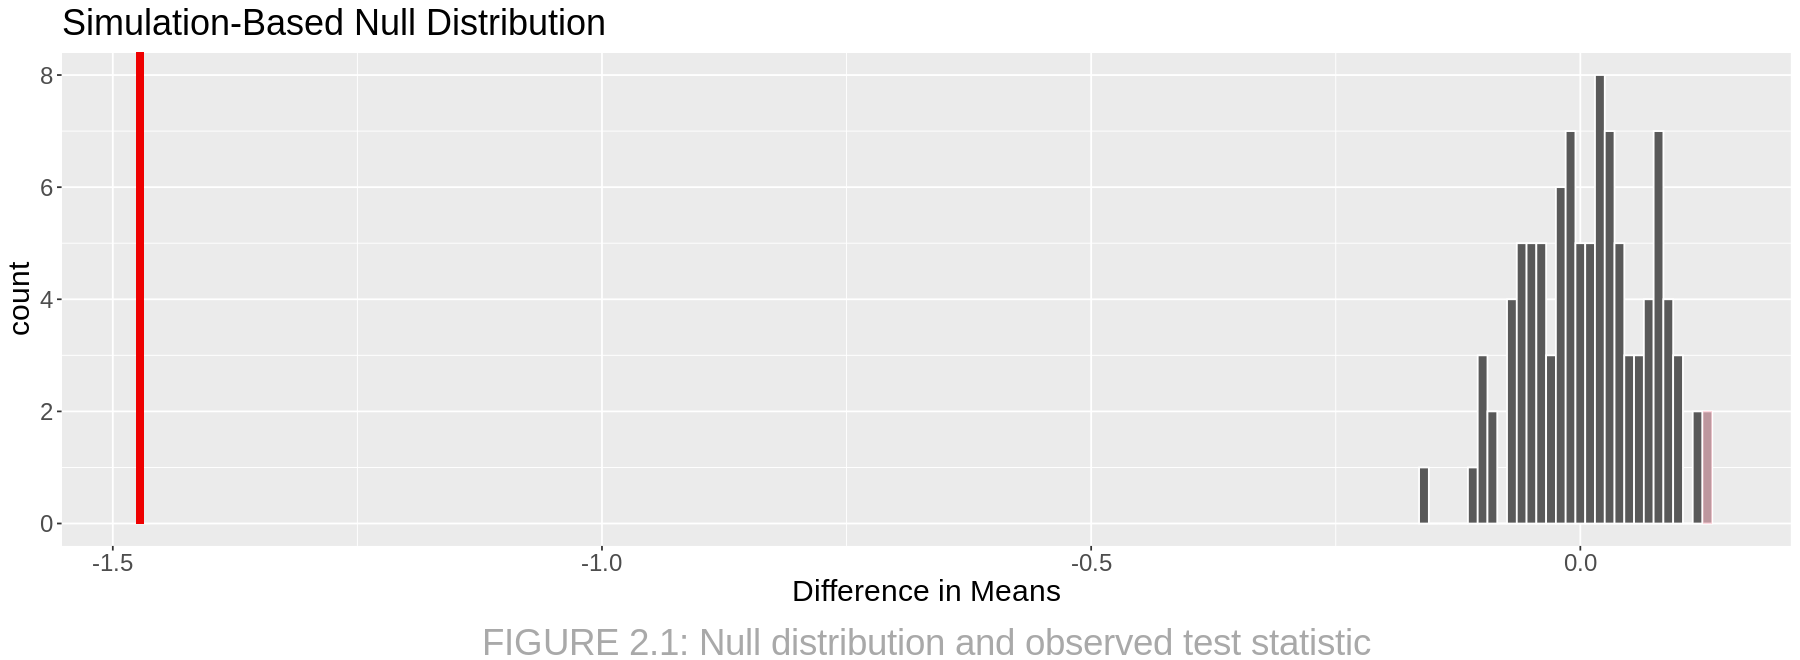

In [10]:
set.seed(1234)
options(repr.plot.width = 15, repr.plot.height = 5.5)

diff_in_means_plot <-
        visualize(null_diff_in_means, bins = 30) +
        shade_p_value(obs_stat = obs_diff_in_means, direction = "both") +
        labs(x = "Difference in Means",
            caption = "FIGURE 2.1: Null distribution and observed test statistic") +
        theme(text = element_text(size = 18),
             plot.caption = element_text(size = 22, color = "darkgrey", hjust = 0.5, vjust = -0.5))

diff_in_means_plot

_Figure 2.1 shows the null distribution of differences between the mean of trees on the curb and the mean of trees not on the curb, namely the ideal distribution of the differences when assuming the null hypothesis $𝐻_{0}$ is true. The red line in Figure 2.1 represents the observed test statistics of difference in means (`obs_diff_in_means`)._

We then obtain the p-value of the observed test statistic (`obs_diff_in_means`) from the null distribution of means (`null_diff_in_means`).

In [11]:
set.seed(1234)

p_val_diff_means <- 
    null_diff_in_means %>% 
    get_p_value(obs_stat = obs_diff_in_means, direction = "both")

p_val_diff_means

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


Table.5: the p value

_The number in Table.5, `p_value` = 0, shows the p value of our hypothesis test, i.e., the chance of obtaining our observed test stadistics of difference in means (`obs_diff_in_means`) when assuming our null hypothesis $H_{0}$ is true._

Given that we now obtain a p-value of 0 just through computing p-value analysis using r. However, as we are using 100 repetitions to calculate the sample, we are going to report that p-value is < 0.01. P-value being less than 0.01 is smaller than our pre-specified significance level of $\alpha = 0.05$, we now can conclude that we reject $H_{0}$ at the 5% significance level. In other words, we reject the $H_{0}$, which there is no difference between means of tree diameters on and not on the curb, at a significance level of $\alpha = 0.05$.

Next, we are going to examine the observed difference in means using t-test.

### 2. Two-sample t-test

We obtain the summary of information about the t-test, using the funtion `t.test`.

In [12]:
set.seed(1234)

t_test_tree <- 
    tidy(t.test(x = tree_curb_Y$DIAMETER,
                y = tree_curb_N$DIAMETER,
                alternative = "two.sided"),
                conf.level = 0.95)

t_test_tree

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-1.472007,11.71744,13.18945,-16.63811,1.018915e-61,18819.8,-1.64542,-1.298594,Welch Two Sample t-test,two.sided


Table.6: summary of informations of the t test.

_Table.6 is a summary of informations of the two sample t test._

_The value of `estimate1`, 11.71603, is the mean of diameter of trees on the curb; the value of `estimate2`, 13.18946, is the mean of diameter of trees not on the curb; the first column, `estimate` (-1.473429), is the the observed test statistics of difference in means (`obs_diff_in_means`), namely `estimate1` minus `estimate2`._

_The `conf.low` (-1.646846) is the lower boundary of 95% confidence interval of the difference in means of trees' (on or not on curb) diameter; `conf.high` (-1.300013) is the upper boundary of the 95% confidence interval. Meaning that we are 95% confident that our confidence interval (-1.646846, -1.300013) will capture the true difference in medians of the trees' diameter._

_The `statistic` (-16.65384) is the quantile of `obs_diff_in_means` under t-distribution; `p.value` ($7.864847e^{-62}$) is the p value of the hypothesis test; `parameter` (18818.35) is the degree of freedom of the t distribution. Meaning that, assuming the null hypothesis is true, when we use t distribution with 18818.35 degree of freedom as our null model, the probability of obtaining our observed difference in means (-1.473429) is $7.864847e^{-62}$ (the p value)._

The test statistic is -16.6532, a highly negative value. Through running `t.test()`, we can notice that our confidence interal is (-1.64687, -1.30002). The p-value of the observed test statistic is $7.949127e^{-62}$. P-value obtained from t-test is also smaller than significance level of $\alpha = 0.05$, we therefore can conclude that we have sufficient evidence to reject $H_{0}$ at the 5% significance level under t-test.

### Computing Confidence Interval

Next, we contruct a 95% confidence Interval to try to capture the true population difference in mean of diameters of trees on and not on the curb. First, we generate the bootstrap distribution for the difference in means with the `infer` package.

In [13]:
set.seed(1234)

diff_in_means_bootstrap_dist <-
    tidy_street_trees %>% 
    specify(formula = DIAMETER ~ CURB) %>%
    generate(reps = 50, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("Y", "N"))

head(diff_in_means_bootstrap_dist)

replicate,stat
<int>,<dbl>
1,-1.574354
2,-1.414618
3,-1.409977
4,-1.461916
5,-1.397928
6,-1.477158


Table.7: preview of bootstrap distribution of difference in means of trees' (on or not on curb) diameters.

_Table.7 is a preview of the bootstrap distribution of differences in means of diameters of trees on or not on curb (mean of diameters of trees on curb minus mean of diameters of tree not on curb)._

Then, we obtain the 95% confidence interval for the difference in mean.

In [14]:
set.seed(1234)

diff_in_means_ci <-
    diff_in_means_bootstrap_dist %>%
    summarise(lower_ci = quantile(stat, 0.025), upper_ci = quantile(stat, 0.975)) 

diff_in_means_ci

lower_ci,upper_ci
<dbl>,<dbl>
-1.636995,-1.288893


Table.8: boundaries of 95% confidence interval.

_The `lower_ci` (-1.636995) is the lower boundary of 95% confidence interval of the difference in means of trees' (on or not on curb) diameter; `upper_ci` (-1.288893) is the upper boundary of the 95% confidence interval. Meaning that we are 95% confident that our confidence interval (-1.636995, -1.288893) will capture the true difference in medians of the trees' diameter._

We visualise the confidence interval (`diff_in_means_ci`) with the bootstrap distribution (`diff_in_means_bootstrap_dist`).

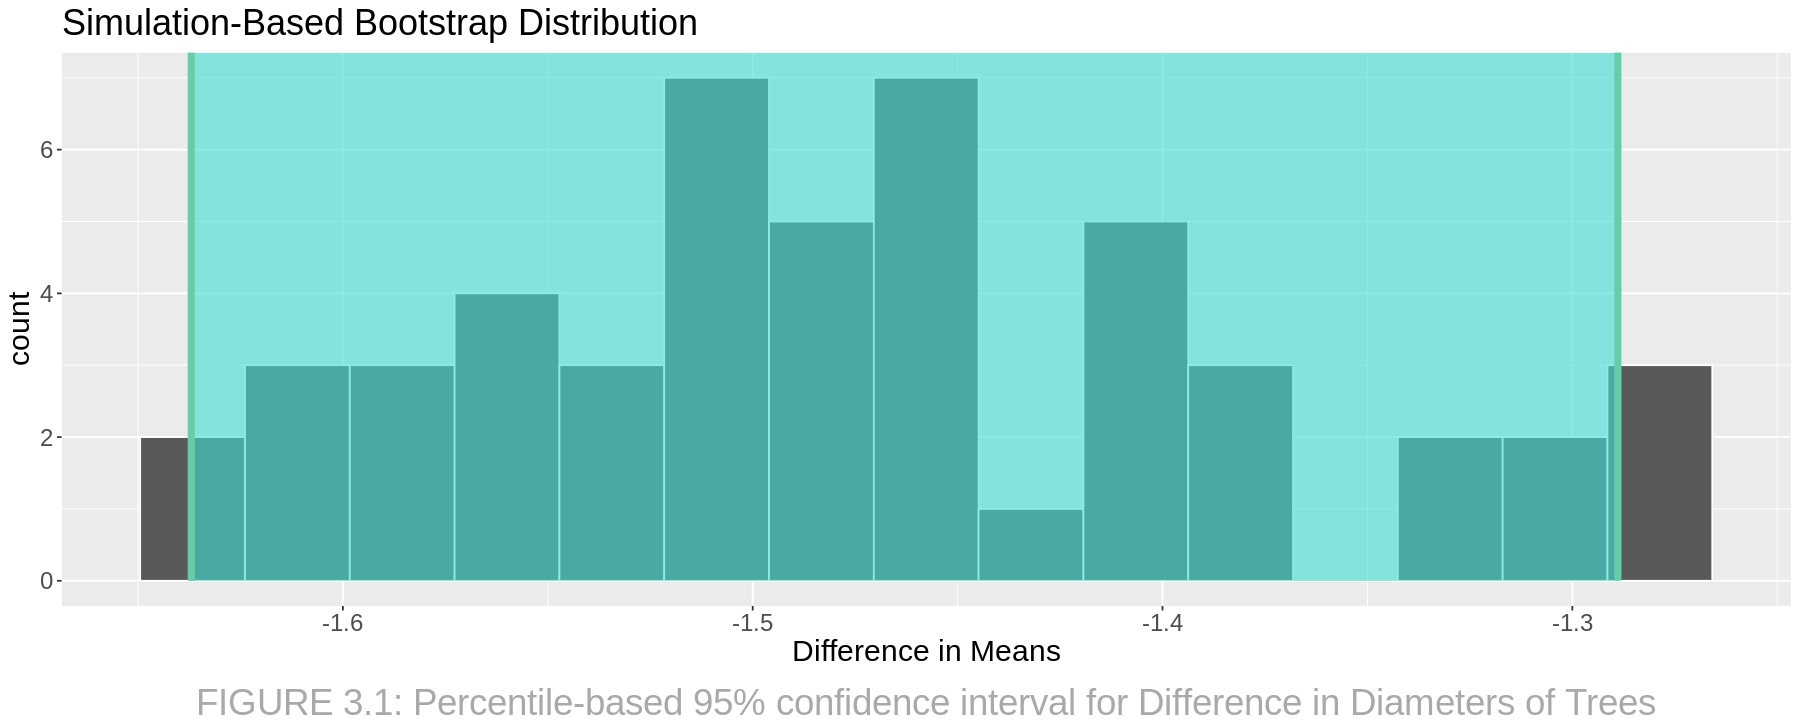

In [15]:
set.seed(1234)
options(repr.plot.width = 15, repr.plot.height = 6)

diff_in_means_ci_plot <-
        visualize(diff_in_means_bootstrap_dist) + 
    shade_confidence_interval(endpoints = diff_in_means_ci) +
    labs(x = "Difference in Means",
        caption = "FIGURE 3.1: Percentile-based 95% confidence interval for Difference in Diameters of Trees") +
    theme(text = element_text(size = 18),
          plot.caption = element_text(size = 22, color = "darkgrey", hjust = 0.5, vjust = -0.5))

diff_in_means_ci_plot

_The 95% confidence interval for sample mean difference in diameters of trees is (-1.636995, -1.288893). Or in other words, we are 95% confident that this 95% confidence interval captures the value of the population parameter of mean difference._

## Discussion

After computing our statistical inference, we thought of three other althernative methods that may be better in terms of improving our statistical inference: 
1. Applying logarithmic transformation (natural log transformation);  
2. utilising median analysis method.
3. utilising ANOVA test method

**Two methods (Alternative Method 1 and 2) were not mentioned during STAT 201 lecutre.** <br>
We will mention these two method without actually computing the analysis as this is out of the scope of this course.

Alongside with these two methods we didn't learn during STAT 201, we can utilise Analysis of Variance (ANOVA) test method, which we can use to analyse the difference between the means of 2 or more groups that are grouped in categories.

### Alternative Method 1: Applying Natural Log Transformation

As we can see from boxplot that we created above (**figure 1.1**), we can tell that natural log scalling is somewhat effective in terms of dealing with outliers.

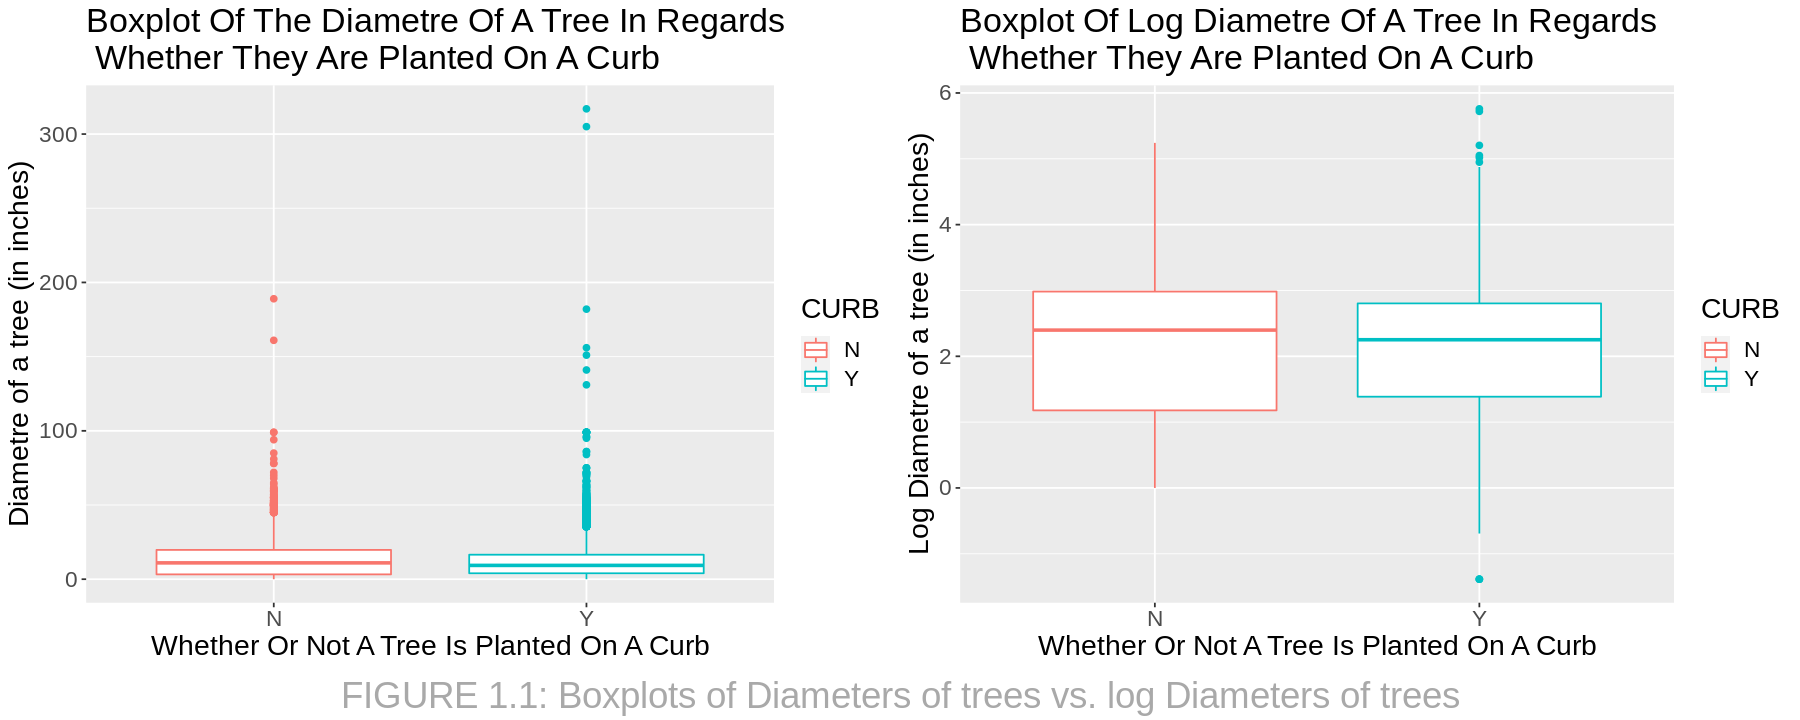

In [16]:
ggdraw(add_sub(boxplots, "FIGURE 1.1: Boxplots of Diameters of trees vs. log Diameters of trees", 
               size = 22, color = "darkgrey"))

Through doing that, as we might be able to create more normal distribution than our original non-scalled sample as we didn't remove out the outliers as it was true outlier that demonstrates the necessary information about our population data.

Still, with the log transformation, we think that the conclusion for our analysis will not change as we are still using the mean values but in log scaled version.

### Alternative Method 2: Utilising Median Analysis Method

If we recall the graph from figure 1.2, we can see that the samples are skewed to the right.

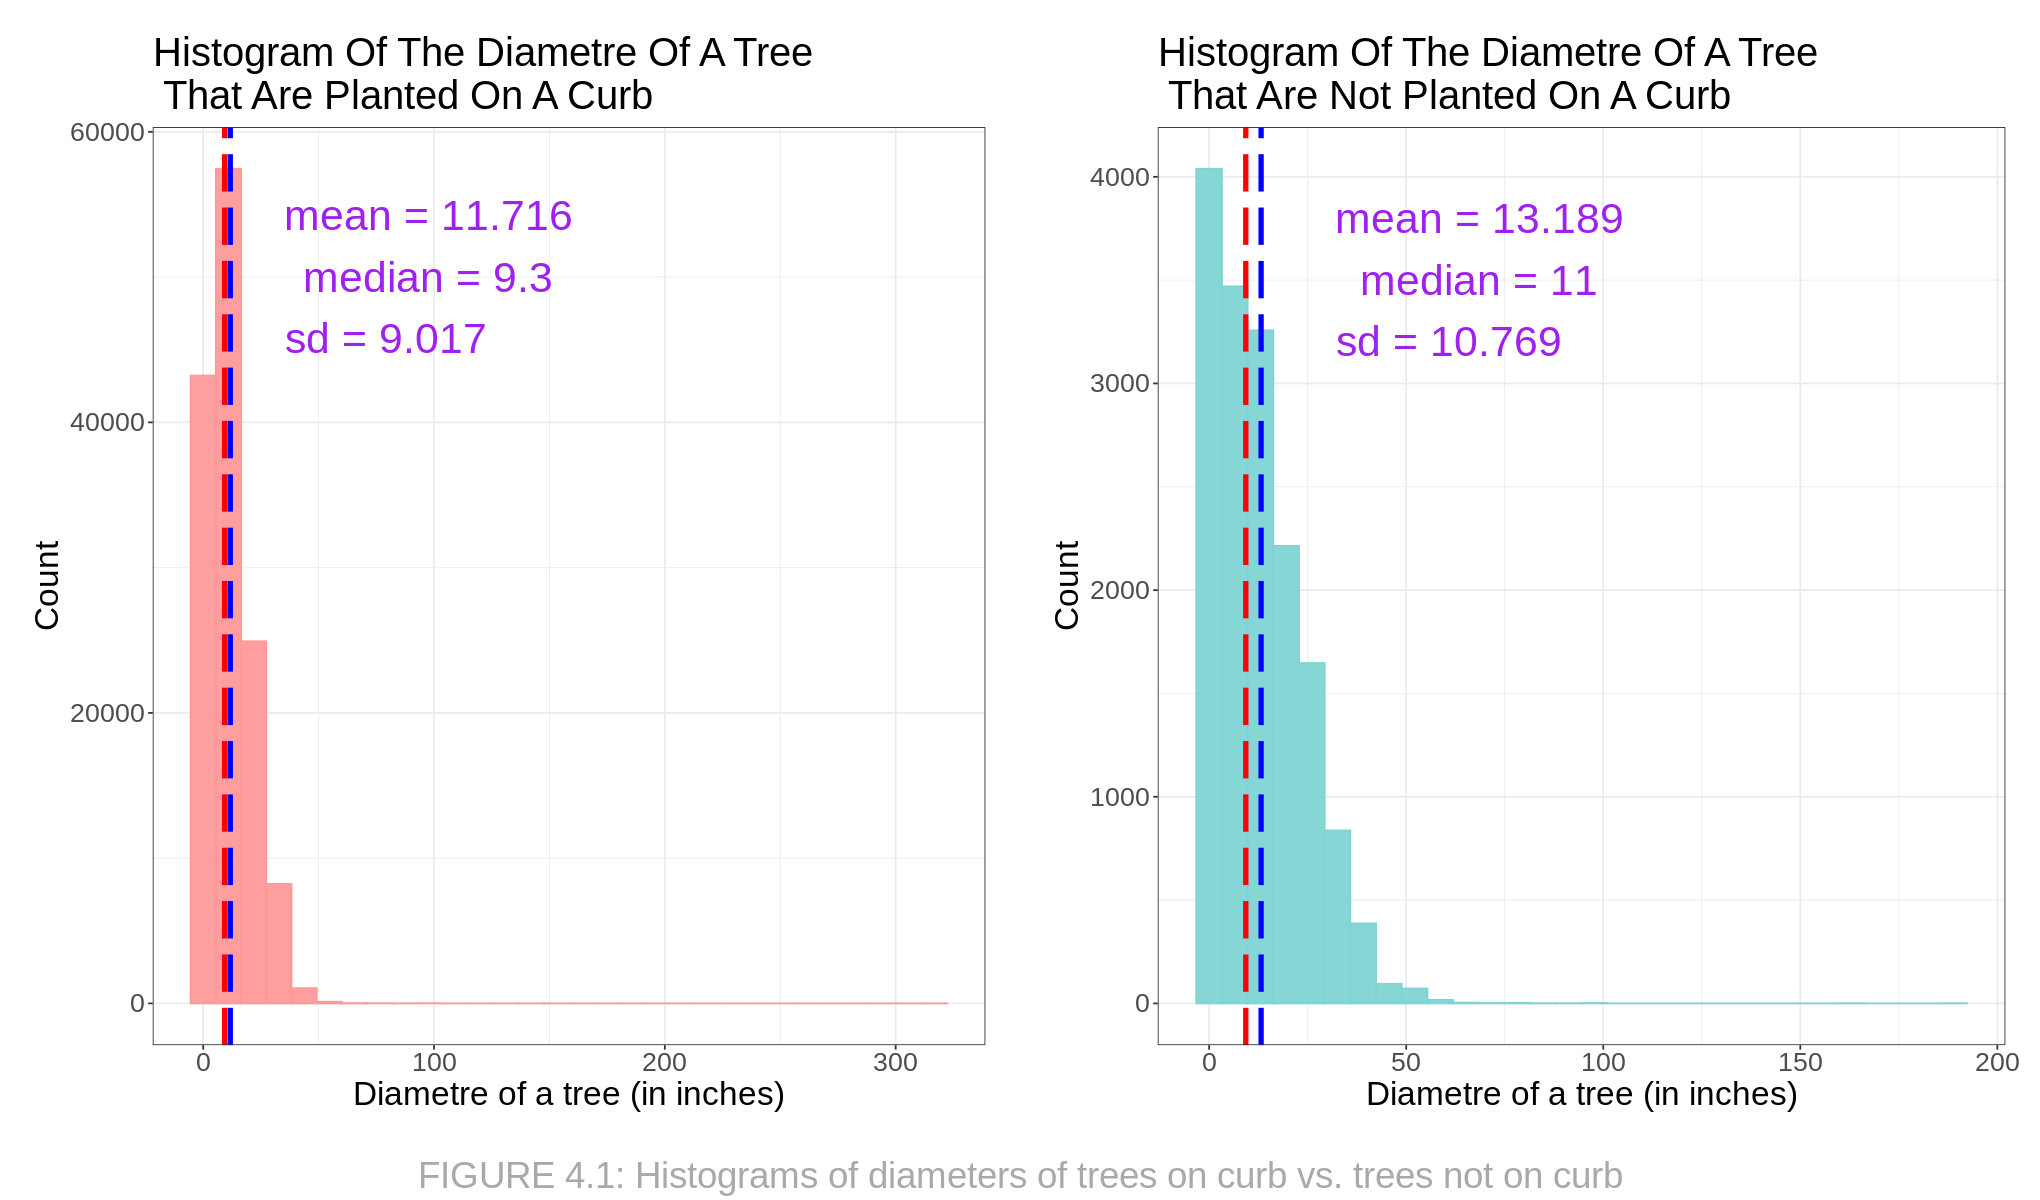

In [17]:
set.seed(1234)
options(repr.plot.width = 17, repr.plot.height = 10)

MDY <- mean(tree_curb_Y$DIAMETER)
MDN <- mean(tree_curb_N$DIAMETER)

MEDY <- median(tree_curb_Y$DIAMETER)
MEDN <- median(tree_curb_N$DIAMETER)

SDDY <- sd(tree_curb_Y$DIAMETER)
SDDN <- sd(tree_curb_N$DIAMETER)

tree_curb_Y_histo <- 
    tree_curb_Y %>%
    ggplot() +
        geom_histogram(aes(DIAMETER), colour = "#FF9999", fill = "#FF9999", alpha = .95 ,bins = 30) +
        labs(x = 'Diametre of a tree (in inches)',
             y = "Count",
             title = 'Histogram Of The Diametre Of A Tree \n That Are Planted On A Curb') +
        geom_vline(xintercept = MDY, colour = "blue", size = 1.5, linetype = 5) +
        geom_vline(xintercept = MEDY, colour = "red", size = 1.5, linetype = 5) +
        theme_bw() +
        theme(text = element_text(size = 20)) +
        annotate("text", x = 100, y = 50000, label = "mean = 11.716 \nmedian = 9.3 \nsd = 9.017        ", size = 9, color = "purple")

tree_curb_N_histo <- 
    tree_curb_N %>%
    ggplot() +
        geom_histogram(aes(DIAMETER), colour = "#80d3d4", fill = "#80d3d4", alpha = .95 ,bins = 30) +
        labs(x = 'Diametre of a tree (in inches)',
             y = "Count",
             title = 'Histogram Of The Diametre Of A Tree \n That Are Not Planted On A Curb') +
        geom_vline(xintercept = MDN, colour = "blue", size = 1.5, linetype = 5) +
        geom_vline(xintercept = MEDY, colour = "red", size = 1.5, linetype = 5) +
        theme_bw() +
        theme(text = element_text(size = 20)) +
        annotate("text", x = 70, y = 3500, label = "mean = 13.189 \nmedian = 11 \nsd = 10.769      ", size = 9, color = "purple")


tree_curb_histo <- plot_grid(tree_curb_Y_histo, tree_curb_N_histo, scale = 0.95)

ggdraw(add_sub(tree_curb_histo, "FIGURE 4.1: Histograms of diameters of trees on curb vs. trees not on curb", 
               size = 22, color = "darkgrey"))

In Figure 4.1, mean is denoted as the blue line and median is denoted as the red line. <br>
As we can tell through the graph, mean is greater than the median.

As the median "is not affected by the precise numerical values of the outliers" (Illowsky & Dean, n.d.), we can do a statistical investigation utilising median as our measure of centre and median absolute deviation as our corresponding scale parameter.

The median absolute deviation (MAD) is a robust measure of the variability of a univariate sample of quantitative data. MAD is calculated by $MAD = median(|X_{i} - \tilde{X}|)$ where $\tilde{X}$ represents $median(X)$.

For median analysis, our population parameter of interest is the difference in population median of tree diameters  $D_{y}  -  D_{n}$ , where  $D_{y}$  is the median of diameters of trees on the curb, and  $D_{n}$  is of trees not on the curb. Then, we set the null hypothesis  $H_{0}$  to be that there is no difference in medians of diameters of trees on and not on the curb. And the alternative hypothesis  $H_{1}$  to be that there is a difference.

$H_{0} : D_{y} - D_{n} = 0 $

$H_{1} : D_{y} - D_{n} \neq 0 $

We also assume that the result will be similar as although our sample is skewed, our mean and median difference is not that huge. Therefore, our P-value may differ, but the conclusion that we have sufficient evidence to reject our null hypothesis will be same.

### Alternative Method 3: Utilising ANOVA Test Method

We did not introduce ANOVA test and instead we utilised t-test method in our project. This is because conventionally, ANOVA test is used when we have "three or more categorical, independent groups" (Laerd Statistics, 2018). However, we will introduce ANOVA method as our alternative method as it is possible to compute p-value and F-value for 2 groups, which will most likely result same result from t-test.

We will use `glimpse()` function to get a glimpse of our `tidy_street_trees` data set that we created above during our analysis.

In [18]:
set.seed(1234)

glimpse(tidy_street_trees)

Rows: 151,101
Columns: 2
$ CURB     <chr> "Y", "Y", "Y", "Y", "Y", "Y", "Y", "Y", "Y", "Y", "N", "N", "…
$ DIAMETER <dbl> 3.00, 27.00, 21.00, 2.25, 4.50, 3.00, 9.00, 9.00, 13.50, 16.0…


For our ANOVA test, our population parameter of interest is the two sample means of tree diameters $d_{y}$, $d_{n}$, where $d_{y}$ is the mean of diameters of trees on the curb, and $d_{n}$ is of trees not on the curb. Also, our variance.
Then, we set the null hypothesis $H_{0}$ to be that the means of diameters of trees on and not on the curb are same. And the alternative hypothesis $H_{1}$ to be that the means of diameters of trees on and not on the curb are not same. 

$H_{0} : d_{y} = d_{n} $

$H_{1} : d_{y} \neq d_{n} $

As our analysis, we are going to use significance level to be 0.05, in notation, $\alpha = 0.05$.

In [19]:
set.seed(1234)

tree_anova <- aov(DIAMETER ~ CURB, data = tidy_street_trees) %>%
    tidy()

tree_anova

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CURB,1,31083.17,31083.17169,365.7033,2.014623e-81
Residuals,151099,12842748.90,84.99559,NA,NA


Table.9: Summary of informations of the ANOVA test

In [21]:
set.seed(1234)

aov_p_val <- tree_anova$p.value[1]

aov_f_val <- tree_anova$statistic[1]

aov_p_val
aov_f_val

[1] 2.014623e-81

[1] 365.7033

In order to find the critical value for one-way ANOVA, we will use `qf()` function.

In [22]:
set.seed(1234)

qf(p=.05, df1=1, df2=151099, lower.tail=FALSE)

[1] 3.84152

Table.9 shows the summary of informations of the ANOVA test
Before interpreting our ANOVA test, `statistic` in our Table.9 shows our F ratio or F value of our test, which is approximately 365.70. The F ratio is the ratio of two mean square values (Zar, 2009). Meaning that closer to 1.0 means that we lack evidence, in other words, we will have insufficient evidence to reject the null hypothesis (Zar, 2009).

Through our ANOVA analysis, we can notice that F-value is approximately 365.7 (in 4 s.f.) and P-value is approximately $2.015e^{-81}$ (in 4 s.f.). <br>
Through computing critical value, we now know that our critical value is 3.842 (in 4 s.f.). <br>
As $3.842 < 365.7$, we now that F-value is way greater than our critical value, meaning that our F-value is in null hypothesis rejection region.
This suggest that we have sufficient evidence to reject the null hypothesis. In other words, with ANOVA testing, we can conclude that there are sufficient evidence to reject the null hypothesis stating that the two groups of trees that are grouped based on whether or not they are closely planted at the curb have same mean value for its diameter. This is the very similar conclusion that we got from our t-test and bootstrap method.

## References and Appendix

### References

_All in-text citation and references are written in  APA 7 (American Psychological Association 7th edition) style_

Illowsky, B., & Dean, S. (n.d.). 2.6: Measures of the Center of the Data. In _Introductory Statistics_. De Anza College: LibreTexts. Retrieved July 22, 2022, from https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(OpenStax)/02%3A_Descriptive_Statistics/2.06%3A_Measures_of_the_Center_of_the_Data

Laerd Statistics. (2018). _One-way ANOVA in SPSS Statistics_. Laerd Statistics. https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

### Appendix A: Data set for street trees in Vancouver (BC, Canada) recorded by City of Vancouver

In [ ]:
library(data.table)

In [ ]:
street_trees_data <- fread("https://opendata.vancouver.ca/explore/dataset/street-trees/download/?format=csv&timezone=America/Los_Angeles&lang=en&use_labels_for_header=true&csv_separator=%3B")

street_trees_data

### Appendix B: Adding Necessary Packages

In order to load the packages, we have to use the code `install.packages()`. Before running the code cell below, check whether the packages are already installed in R as it takes a while to run this cell.
After installing relevant packages, we need to load it into workflow using `library()`

In [ ]:
install.packages("tidyverse")
install.packages("tidymodels")
install.packages("repr")
install.packages("cowplot")
install.packages("ggplot2")
install.packages("GGally")
install.packages("digest")
install.packages("infer")
install.packages("RCurl")
install.packages("data.table")